In [12]:
import numpy as np
import json
from matplotlib import pyplot as plt

In [13]:
with open('../../synonym_results_nn_table.json') as f:
    data = json.load(f)

In [14]:
def plot_n_syms_gain(json_data, n, addition=None):
    # plt.figure(figsize=(20,12))
    positions = [[] for i in range(n)]

    for target_word in json_data.keys():    
        target_word_num_synonyms = 0

        # Gets the number of synonyms
        for query_id in json_data.get(target_word):
            query_data = json_data.get(target_word).get(query_id)
            target_word_num_synonyms = max(query_data.get('number_query_objects'), target_word_num_synonyms)

        if target_word_num_synonyms != n:
            continue

        for query_id in json_data.get(target_word):
            query_data = json_data.get(target_word).get(query_id)

            num_queries = query_data.get('number_query_objects')
            target_position = query_data.get('target_position')

            if target_position != -1:
                positions[num_queries - 1].append(100 - target_position)
            else:
                positions[num_queries - 1].append(0)
        
        
    # title = f"Performance of Polyquery on Word with {n} Possible Synonyms"
    # if addition != None:e
        # title += f" {addition}"
    # plt.title(title)
    plt.xlabel("Number of Synonyms Used")
    plt.ylabel("Gain (bigger is better)")
    
    plt.ylim([0, 50])
    # Plot the means
    xs = [i + 1 for i in range(n)]
    plt.xticks(xs)
    ys = [np.mean(positions[i]) for i in range(len(positions))]
    errs = [np.std(x) / np.sqrt(len(x)) for x in positions]

    plt.errorbar(xs, ys, errs, capsize=4, linestyle='', zorder=0)
    plt.scatter(xs, ys, c='red', s=12, zorder=1)
    # Plot the errors
    plt.show()

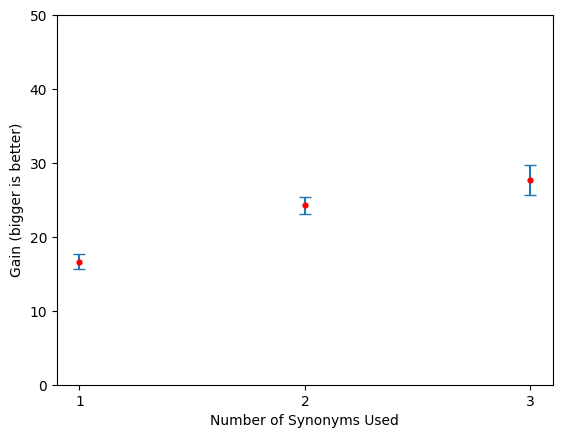

In [15]:
plot_n_syms_gain(data, 3)

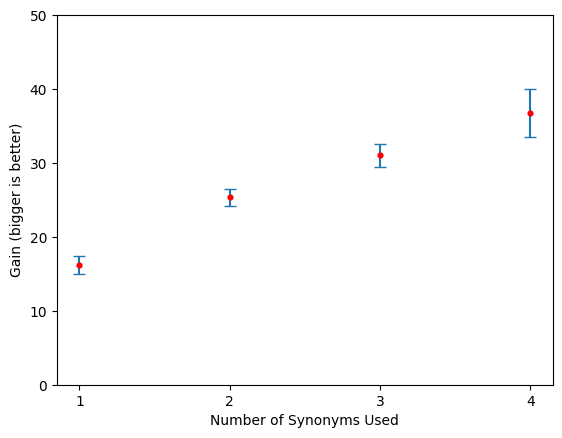

In [16]:
plot_n_syms_gain(data, 4)

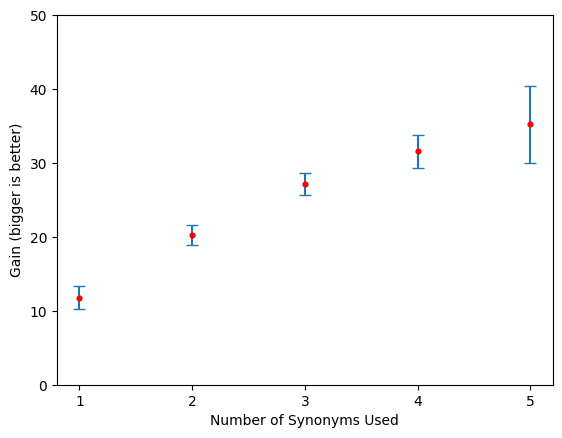

In [17]:
plot_n_syms_gain(data, 5)

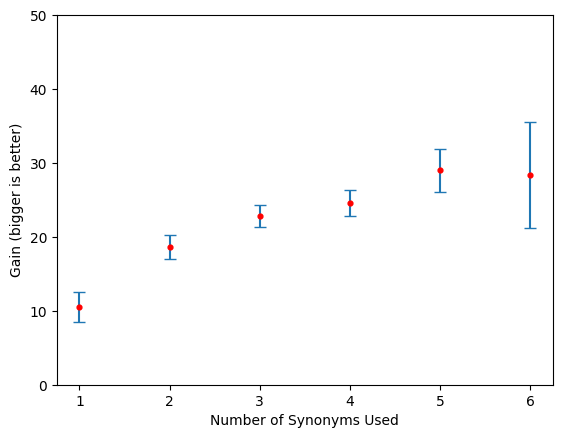

In [18]:
plot_n_syms_gain(data, 6)

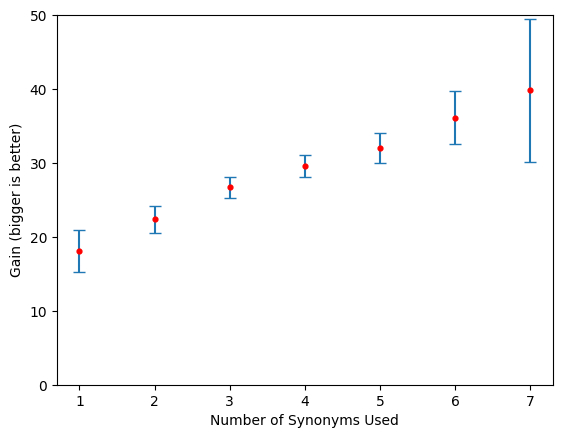

In [19]:
plot_n_syms_gain(data, 7)

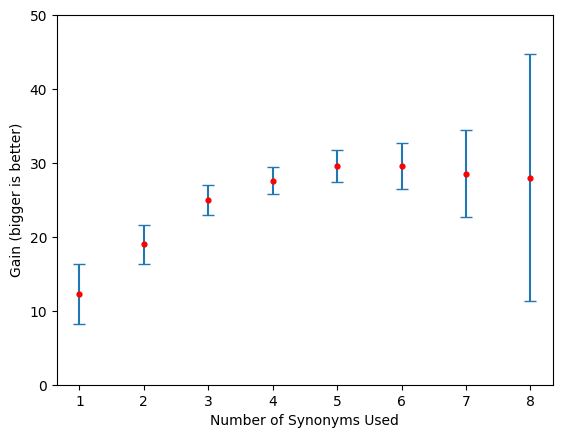

In [20]:
plot_n_syms_gain(data, 8)

## Timing Results

In [21]:
def get_timing_results(json_data, n):
    approx_times = [[] for i in range(n)]
    exact_times = [[] for i in range(n)]


    for target_word in json_data.keys():    
        for query_id in json_data.get(target_word):
            query_data = json_data.get(target_word).get(query_id)

            num_queries = query_data.get('number_query_objects')
            exact_time = query_data.get('exact_time')
            approx_time = query_data.get('approx_time')

            approx_times[num_queries - 1].append(approx_time)
            exact_times[num_queries - 1].append(exact_time)

        
    # Plot the exacts
    xs = [i + 1 for i in range(n)]
    plt.xticks(xs)
    ys = [np.mean(exact_times[i]) for i in range(len(exact_times))]
    errs = [np.std(x) / np.sqrt(len(x)) for x in exact_times]

    plt.errorbar(xs, ys, errs, capsize=4, linestyle='', zorder=0)
    plt.scatter(xs, ys, c='red', s=12, zorder=1)
    plt.xlabel("Number of Synonyms Used")
    plt.ylabel("Time (ms)")
    # Plot the errors
    plt.show()

    # Plot the approxs
    xs = [i + 1 for i in range(n)]
    plt.xticks(xs)
    ys = [np.mean(approx_times[i]) for i in range(len(approx_times))]
    errs = [np.std(x) / np.sqrt(len(x)) for x in approx_times]

    plt.errorbar(xs, ys, errs, capsize=4, linestyle='', zorder=0)
    plt.scatter(xs, ys, c='red', s=12, zorder=1)
    # Plot the errors

    plt.xlabel("Number of Synonyms Used")
    plt.ylabel("Time (ms)")
    plt.show()


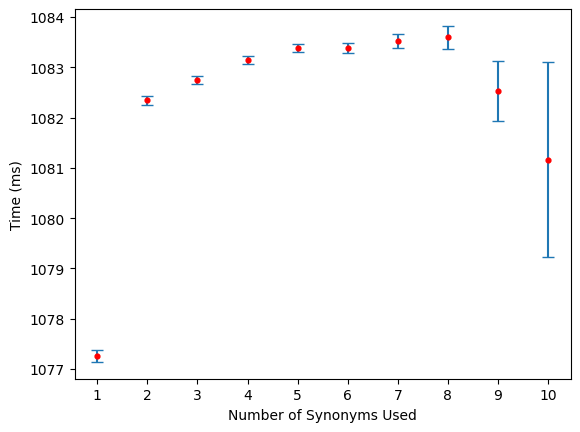

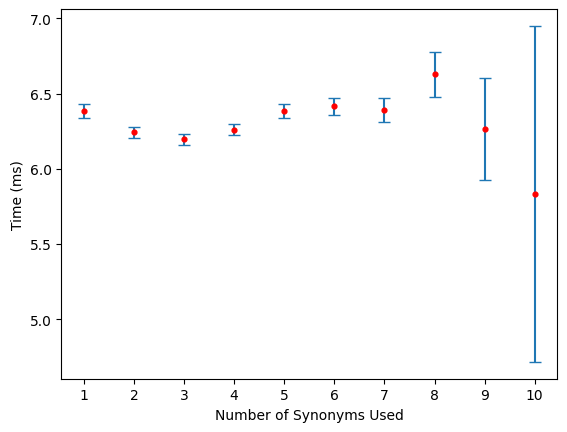

In [22]:
get_timing_results(data, 10)

## Gets Recall

In [23]:
def get_recall_results(json_data, n):
    recalls = [[] for i in range(n)]


    for target_word in json_data.keys():    
        for query_id in json_data.get(target_word):
            query_data = json_data.get(target_word).get(query_id)

            num_queries = query_data.get('number_query_objects')
            recall = query_data.get('recall')
            recalls[num_queries - 1].append(recall)
        
    # Plot the exacts
    xs = [i + 1 for i in range(n)]
    plt.xticks(xs)
    ys = [np.mean(recalls[i]) for i in range(len(recalls))]
    errs = [np.std(x) / np.sqrt(len(x)) for x in recalls]

    plt.errorbar(xs, ys, errs, capsize=4, linestyle='', zorder=0)
    plt.scatter(xs, ys, c='red', s=12, zorder=1)
    # Plot the errors


    plt.xlabel("Number of Synonyms Used")
    plt.ylabel("Recall@100")

    plt.show()


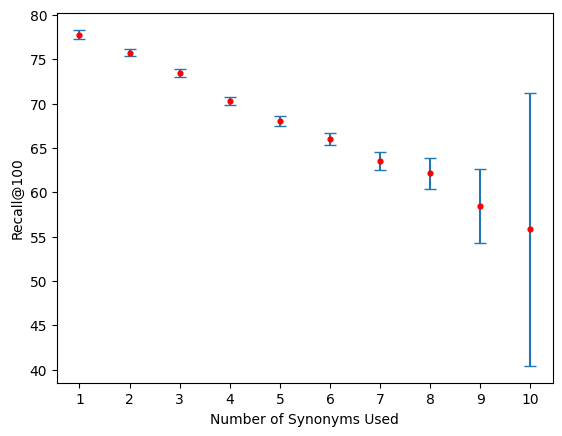

In [24]:
get_recall_results(data, 10)